In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [17]:
train_dir = 'dataset/dataset/train'
test_dir = 'dataset/dataset/test'

In [18]:
# Train Dataset

#fresh
fresh_apples_train_dir = os.path.join(train_dir, 'freshapples')
fresh_banana_train_dir = os.path.join(train_dir, 'freshbanana')
fresh_oranges_train_dir = os.path.join(train_dir, 'freshoranges')

#rotten
rotten_apples_train_dir = os.path.join(train_dir, 'rottenapples')
rotten_banana_train_dir = os.path.join(train_dir, 'rottenbanana')
rotten_oranges_train_dir = os.path.join(train_dir, 'rottenoranges')

In [19]:
# Test Dataset

#fresh
fresh_apples_test_dir = os.path.join(test_dir, 'freshapples')
fresh_banana_test_dir = os.path.join(test_dir, 'freshbanana')
fresh_oranges_test_dir = os.path.join(test_dir, 'freshoranges')

#rotten
rotten_apples_test_dir = os.path.join(test_dir, 'rottenapples')
rotten_banana_test_dir = os.path.join(test_dir, 'rottenbanana')
rotten_oranges_test_dir = os.path.join(test_dir, 'rottenoranges')

In [20]:
print("No. of train fresh apple image : ", len(os.listdir(fresh_apples_train_dir)))
print("No. of train fresh banana image : ", len(os.listdir(fresh_banana_train_dir)))
print("No. of train fresh orange image : ", len(os.listdir(fresh_oranges_train_dir)))
print("No. of train rotten apple image : ", len(os.listdir(rotten_apples_train_dir)))
print("No. of train rotten banana image : ", len(os.listdir(rotten_banana_train_dir)))
print("No. of train rotten orange image : ", len(os.listdir(rotten_oranges_train_dir)))

No. of train fresh apple image :  1693
No. of train fresh banana image :  1581
No. of train fresh orange image :  1466
No. of train rotten apple image :  2342
No. of train rotten banana image :  2224
No. of train rotten orange image :  1595


In [21]:
print("No.of test fresh apple image : ", len(os.listdir(fresh_apples_test_dir)))
print("No.of test fresh banana image : ", len(os.listdir(fresh_banana_test_dir)))
print("No.of test fresh orange image : ", len(os.listdir(fresh_oranges_test_dir)))
print("No.of test rotten apple image : ", len(os.listdir(rotten_apples_test_dir)))
print("No.of test rotten banana image : ", len(os.listdir(rotten_banana_test_dir)))
print("No.of test rotten orange image : ", len(os.listdir(rotten_oranges_test_dir)))

No.of test fresh apple image :  395
No.of test fresh banana image :  381
No.of test fresh orange image :  388
No.of test rotten apple image :  601
No.of test rotten banana image :  530
No.of test rotten orange image :  403


(320, 334)


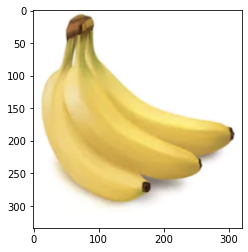

In [22]:
from keras.preprocessing.image import load_img

filename = os.listdir(fresh_banana_train_dir)
sample = random.choice(filename)
image = load_img(os.path.join(fresh_banana_train_dir,sample))
print(image.size)
plt.imshow(image)

In [3]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=c1a9649101ce82893489ef8d68e6b4f249382f0d9f7a2108b2d6e4afa81aad54
  Stored in directory: c:\users\harshit\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


You should consider upgrading via the 'c:\users\harshit\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, LearningRateScheduler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import argparse
import cv2

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=15,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
                    'dataset/train',
                    target_size = (150,150),
                    batch_size = 15,
                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
                    'dataset/test',
                    target_size=(150,150),
                    batch_size= 15,
                    class_mode='categorical'
)

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [7]:
baseModel = ResNet50V2(weights="imagenet",include_top=False, input_tensor=Input(shape=(150,150,3)))

headModel=baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(6, activation="softmax")(headModel)

model = Model(inputs=baseModel.input,outputs=headModel)

for layer in baseModel.layers: layer.trainable=False

94674944/94668760 [==============================] - 14s 0us/step


In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 77, 77, 64)   0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
model.compile(
    loss='binary_crossentropy',
    optimizer = Adam(lr=1e-3,decay=1e-3/25),
    metrics=["accuracy"]
)

c:\users\harshit\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [10]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch = len(train_generator)//15,
    validation_steps=len(validation_generator)//15,
    epochs=30,
    verbose=1
)

Epoch 1/30
48/48 [==============================] - 50s 922ms/step - loss: 0.6319 - accuracy: 0.3949 - val_loss: 0.1453 - val_accuracy: 0.8556
Epoch 2/30
48/48 [==============================] - 42s 863ms/step - loss: 0.2412 - accuracy: 0.7310 - val_loss: 0.0863 - val_accuracy: 0.9222
Epoch 3/30
48/48 [==============================] - 41s 847ms/step - loss: 0.1602 - accuracy: 0.8242 - val_loss: 0.0853 - val_accuracy: 0.9056
Epoch 4/30
48/48 [==============================] - 41s 859ms/step - loss: 0.1481 - accuracy: 0.8523 - val_loss: 0.0715 - val_accuracy: 0.9389
Epoch 5/30
48/48 [==============================] - 39s 812ms/step - loss: 0.1586 - accuracy: 0.8504 - val_loss: 0.0446 - val_accuracy: 0.9778
Epoch 6/30
48/48 [==============================] - 40s 829ms/step - loss: 0.1151 - accuracy: 0.8922 - val_loss: 0.0518 - val_accuracy: 0.9611
Epoch 7/30
48/48 [==============================] - 38s 785ms/step - loss: 0.1160 - accuracy: 0.8896 - val_loss: 0.0412 - val_accuracy: 0.9667

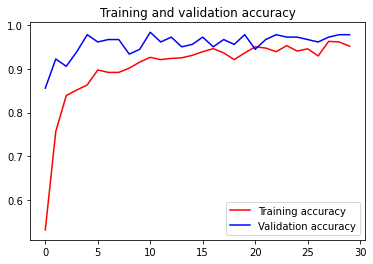

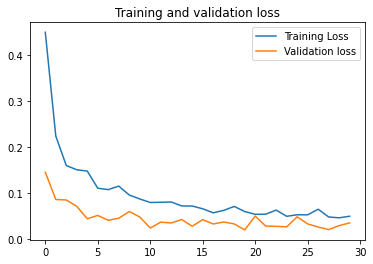

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs,acc,'r', label='Training accuracy')
plt.plot(epochs,val_acc,'b', label='Validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

In [14]:
model.evaluate(validation_generator)

180/180 [==============================] - 89s 491ms/step - loss: 0.0259 - accuracy: 0.9741


[0.025932220742106438, 0.9740548729896545]

In [15]:
result = model.evaluate_generator(validation_generator)
print(result)
print('Accuracy: ', result[1])

c:\users\harshit\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.025932220742106438, 0.9740548729896545]
Accuracy:  0.9740548729896545


dataset/dataset/test\freshbanana\vertical_flip_Screen Shot 2018-06-12 at 9.56.16 PM.png
[[0. 1. 0. 0. 0. 0.]]
fresh banana


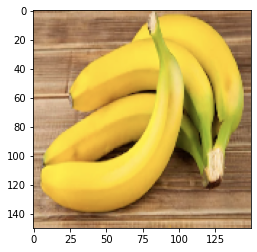

In [26]:
from keras.preprocessing.image import img_to_array

names = [fresh_apples_test_dir,
         fresh_banana_test_dir,
         fresh_oranges_test_dir,
         rotten_apples_test_dir,
         rotten_banana_test_dir,
         rotten_oranges_test_dir
]
name_rand = random.choice(names)


filename = os.listdir(name_rand)
sample = random.choice(filename)
fn = os.path.join(name_rand,sample)
print(fn)


img = load_img(fn, target_size=(150, 150))
plt.imshow(img)


x = img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes)


prediction = ''

if classes[0][0]==1:
    prediction = 'fresh apple'
elif classes[0][1]==1:
    prediction = 'fresh banana'
elif classes[0][2]==1:
    prediction = 'fresh orange'
elif classes[0][3]==1:
    prediction = 'rotten apple'
elif classes[0][4]==1:
    prediction = 'rotten banana'
elif classes[0][5]==1:
    prediction = 'rotten orange'

print(prediction)